# K-Means Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1-D Clusterization

In [5]:
values = np.zeros(20)
x1 = np.random.normal(loc=3, scale=1, size=(20,))
x2 = np.random.normal(loc=12, scale=1, size=(20,))
x3 = np.random.normal(loc=18, scale=1, size=(20,))

X = np.array([])
X = np.append(X,[x1, x2, x3])


In [11]:
X

array([ 1.16170761,  2.94238239,  4.63562359,  1.20173943,  3.28014522,
        2.29977188,  3.23400072,  2.61600092,  2.94639426,  1.75954901,
        3.28616457,  2.73238667,  0.14430209,  3.82285164,  0.83735952,
        2.99111986,  1.8674432 ,  2.80846822,  3.13375915,  3.79933849,
       13.49665683, 11.24392308, 10.17197869, 13.22639671, 12.94885096,
       12.30549864, 11.38140975, 12.85322043, 10.619485  , 11.15884202,
       12.17706794, 11.67110683,  8.73252274, 11.35711888, 13.53178108,
       11.93499199, 10.76434245, 11.82400737, 12.43505601, 11.43268094,
       17.63239308, 19.2838207 , 19.58554847, 18.19937308, 18.14185553,
       17.99634235, 18.53514944, 18.49561433, 17.45310469, 19.45711157,
       17.51230423, 18.76566235, 16.66201242, 18.17897734, 17.60306532,
       17.11539487, 17.93560892, 18.09054248, 17.84464888, 18.04440057])

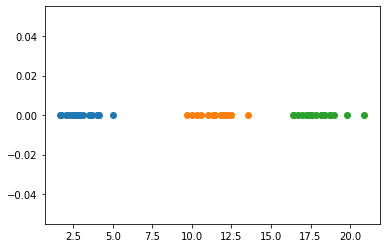

In [4]:
plt.plot(x1, values, 'o')
plt.plot(x2, values, 'o')
plt.plot(x3, values, 'o')
# values = np.zeros(60)
# plt.plot(X, values, 'o')

In [6]:
def wcss(cluster_points, points):
    wcss_value=0

    for point in points:
        for i in range(len(cluster_points)):
            if i == 0:  
                min_val = abs(point-cluster_points[i])

            else:
                temp = abs(point-cluster_points[i])
                if temp < min_val:
                    min_val = temp

        wcss_value += min_val**2

    return wcss_value

In [12]:
# Elbow method

def elbow_method(points, k_max):

    WCSS=[]
    cluster_points = np.array([])
    
    for i in range(k_max):
        cluster_points = np.append(cluster_points, np.random.random_integers(math.floor(min(points)), math.ceil(max(points)), 1))
        WCSS.append(wcss(cluster_points, points))

    return WCSS

[4115.18622788028, 4060.961780825741, 4032.2006189537947, 997.1481894833348, 987.7846166539949]


/tmp/ipykernel_25827/3928080801.py:9: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  cluster_points = np.append(cluster_points, np.random.random_integers(math.floor(min(points)), math.ceil(max(points)), 1))


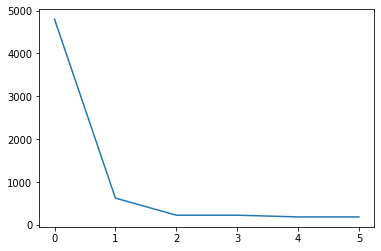

In [20]:
print(elbow_method(X, 5))

k_values = elbow_method(X,6)
plt.plot(k_values)

In [139]:
print(k_values)

[5400.632537401554, 3152.218679794171, 779.2238294083895, 380.85870000836314, 47.26507296886593, 199.56973969844648, 66.11894192789377, 90.31550947823301, 218.73065910814512, 163.97622535994927, 246.23277814121772, 34.994161088596314, 28.338569155382206, 130.83519533908463, 85.70642845737314, 21.766696622115383, 25.754538895543796, 24.49904241501222, 28.820628608599883]


In [21]:
def avg(cluster_points, clusters):
    for i in range(len(clusters)):
        cluster_points[i] = sum(clusters[i])/len(clusters[i])

    return cluster_points

In [22]:
k=3
cluster_points = np.random.random_integers(math.floor(min(X)), math.ceil(max(X)), k)
clusters = []

for i in range(3):
    clusters.append([])
N = 10
for j in range(N):
    for x in X:
        cluster_id=0
        for i in range(len(cluster_points)):
            if i == 0:  
                    min_val = abs(x-cluster_points[i])
                    cluster_id = i
            else:
                temp = abs(x-cluster_points[i])
                if temp < min_val:
                    min_val = temp
                    cluster_id = i

        clusters[cluster_id].append(x)

    cluster_points = avg(cluster_points, clusters)



# print(clusters)

/tmp/ipykernel_25827/3017929277.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  cluster_points = np.random.random_integers(math.floor(min(X)), math.ceil(max(X)), k)


209


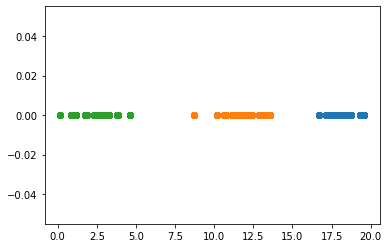

In [23]:
print(len(clusters[0]))
plt.plot(clusters[0], np.zeros(len(clusters[0])), 'o')
plt.plot(clusters[1], np.zeros(len(clusters[1])), 'o')
plt.plot(clusters[2], np.zeros(len(clusters[2])), 'o')

## 2-D Clusterization